# Part 1.

In [1262]:
import pandas as pd

url = "https://raw.githubusercontent.com/joestubbs/coe379L-fa25/main/datasets/unit01/project1.csv"
df = pd.read_csv(url)


In [1263]:
# Just would like to see what the data contains at first and if it is loaded.
df.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


## Identifying the Shape and Size

In [1264]:
df.shape

(131165, 12)

In [1265]:
df.size

1573980

df.info()

There are 131165 Rows and 12 Columns in this dataset. 
This accounts for a total of 1573980 total cells.
From basic exploratory analysis, we can also note some basic info about the structure of the columns of the data.

## Datatypes

In [1266]:
df.dtypes

Animal ID           object
Date of Birth       object
Name                object
DateTime            object
MonthYear           object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

Right now the data is all object types. There absolutely must be some datatype conversions, as object is only for string types. We should convert Date of Birth, DateTime to a datetime64 types. Additionally, Sex, Outcome Type, Outcome Subtype, Animal Type should be categorical. Age can be parsed as a numeric type, and we can define age in terms of days for more a standardized approach. 

In [1267]:
df.duplicated().sum()

17

In [1268]:
# Let's drop the 17 duplicated rows. We'll use inplace to change df, and ignore_index to reindex the data structure.
df.drop_duplicates(inplace=True, ignore_index=True)

In [1269]:
df.shape

(131148, 12)

We can confirm the rows were properly deleted! 

## Missing Values/NaNs

In [1270]:
df.isna().sum()

Animal ID               0
Date of Birth           0
Name                37503
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [1271]:
# Let's start by replacing missing values for Name. We can impute with a constant value, because Name has no category.
df['Name'] = df['Name'].fillna('Unknown')

# We will impute the subtype column by the group mode of the Outcome Type.
# Outcome Type is the perfect predictor for imputing the missing values.
df['Outcome Subtype'] = df['Outcome Subtype'].fillna(
    df.groupby('Outcome Type')['Outcome Subtype'].transform(lambda x: x.mode()[0])
)

In [1272]:
df.isna().sum()

Animal ID            0
Date of Birth        0
Name                 0
DateTime             0
MonthYear            0
Outcome Type        40
Outcome Subtype     38
Animal Type          0
Sex upon Outcome     0
Age upon Outcome     0
Breed                0
Color                0
dtype: int64

At this point, the only Rows left are the ones without a type of a subtype. We can delete these. 
Observe that this is only 40/131165 of the rows, or 0.03% of the entire dataset.
It would be wise to clean these rows.

In [1273]:
df.dropna(inplace=True, subset=['Outcome Type'])

In [1274]:
df.isna().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

No null values remain!!

## Completing the Preprocessing 

Now that there are no NaN values, we should convert each of the data types as well as drop columns which are no longer necessary.
Of the columns, Animal ID and Name do not provide any relevant information. Animal ID is a unique identifier and Names are not useful in statistics. Neither have any true use.

In [1275]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Animal ID'], axis=1, inplace=True)
df.shape

(131108, 10)

Let us first begin by converting from object --> categorical on the columns previously discussed.

In [1276]:
df['Outcome Type'] = df['Outcome Type'].astype('category')
df['Outcome Subtype'] = df['Outcome Subtype'].astype('category')
df['Animal Type'] = df['Animal Type'].astype('category')
df['Sex upon Outcome'] = df['Sex upon Outcome'].astype('category')
df['Breed'] = df['Breed'].astype('category')
df['Color'] = df['Color'].astype('category')

Observe that Date of Birth can be directly derived from Age upon Outcome. There is not much use for this column.

In [1277]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df.drop(['DateTime'], axis=1, inplace=True)

In [1278]:
df.drop(['Date of Birth'], axis=1, inplace=True)

Let's make Age upon Outcome store the animal's age in Days! 

In [1279]:
def apply_conversion(age):
    split = age.split()
    num, type = split[0], split[1]
    num = float(num)
    if 'day' in type:
        return num
    elif 'week' in type:
        return num * 7
    elif 'month' in type:
        return num * 30
    elif 'year' in type:
        return num * 365
    else:
        raise TypeError

df['Age upon Outcome'] = df['Age upon Outcome'].apply(apply_conversion)

In [1280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   MonthYear         131108 non-null  object  
 1   Outcome Type      131108 non-null  category
 2   Outcome Subtype   131108 non-null  category
 3   Animal Type       131108 non-null  category
 4   Sex upon Outcome  131108 non-null  category
 5   Age upon Outcome  131108 non-null  float64 
 6   Breed             131108 non-null  category
 7   Color             131108 non-null  category
 8   Year              3205 non-null    float64 
 9   Month             3205 non-null    float64 
 10  Day               3205 non-null    float64 
dtypes: category(6), float64(4), object(1)
memory usage: 7.1+ MB


## Univariate Analysis

In [1281]:
# Get some basic statistics of each of the variables
df.describe()

,Age upon Outcome,Year,Month,Day
count,131108.000000,3205.000000,3205.000000,3205.000000
mean,574.969163,2018.337598,6.583151,16.116381
std,876.400139,2.973390,3.053471,8.667127
min,1.000000,2014.000000,1.000000,1.000000
25%,60.000000,2016.000000,4.000000,9.000000
50%,240.000000,2017.000000,7.000000,16.000000
75%,730.000000,2020.000000,9.000000,24.000000
max,10950.000000,2025.000000,12.000000,31.000000


In [1282]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age upon Outcome', ylabel='Count'>

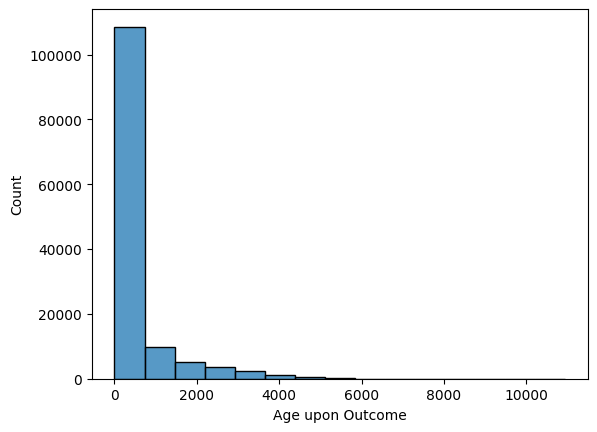

In [1283]:
# Analyzing numeric data --> Age of Outcome
sns.histplot(data=df['Age upon Outcome'], bins=15)

<Axes: xlabel='Year', ylabel='Count'>

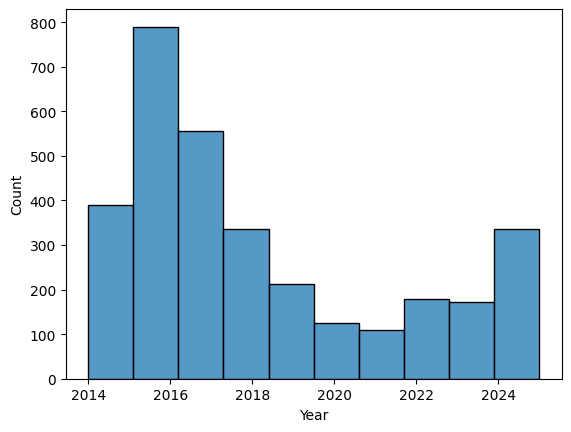

In [1284]:
# Analyzing numeric data --> Year
sns.histplot(data=df['Year'], bins=10)

<Axes: xlabel='Month', ylabel='Count'>

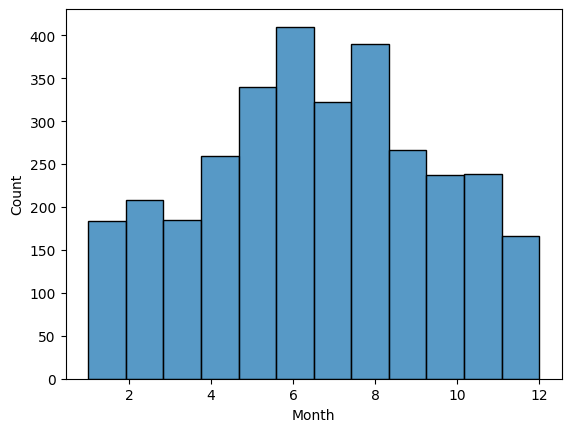

In [1285]:
# Analyzing numeric data --> Month
sns.histplot(data=df['Month'], bins=12)

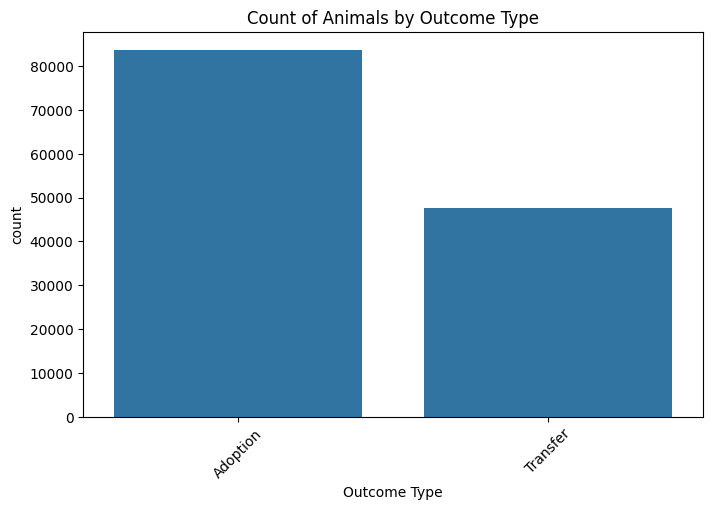

In [1286]:
# Analyzing Categorial Data --> Outcome  Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Outcome Type', order=df['Outcome Type'].value_counts().index)
plt.title('Count of Animals by Outcome Type')
plt.xticks(rotation=45)
plt.show()

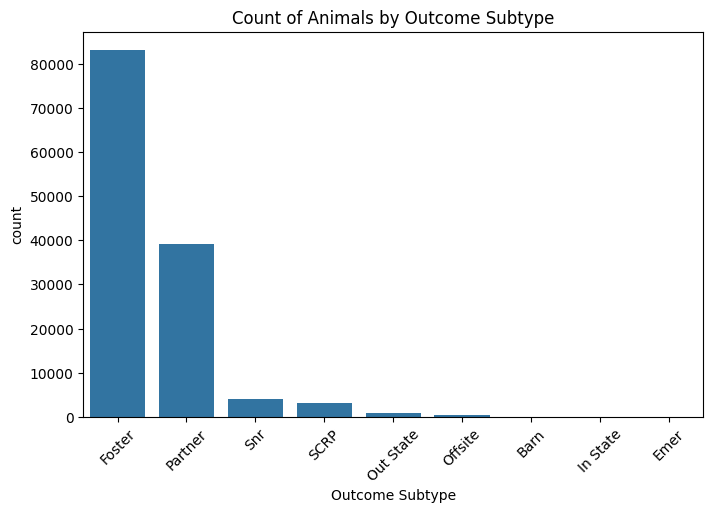

In [1287]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Outcome Subtype', order=df['Outcome Subtype'].value_counts().index)
plt.title('Count of Animals by Outcome Subtype')
plt.xticks(rotation=45)
plt.show()

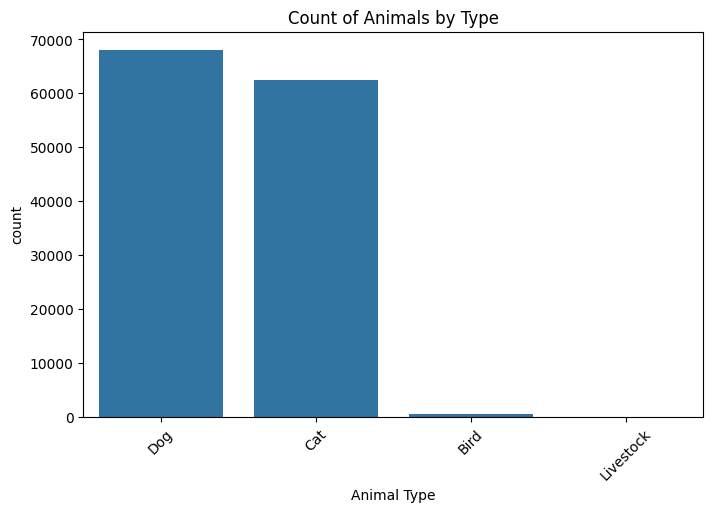

In [1288]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Animal Type', order=df['Animal Type'].value_counts().index)
plt.title('Count of Animals by Type')
plt.xticks(rotation=45)
plt.show()

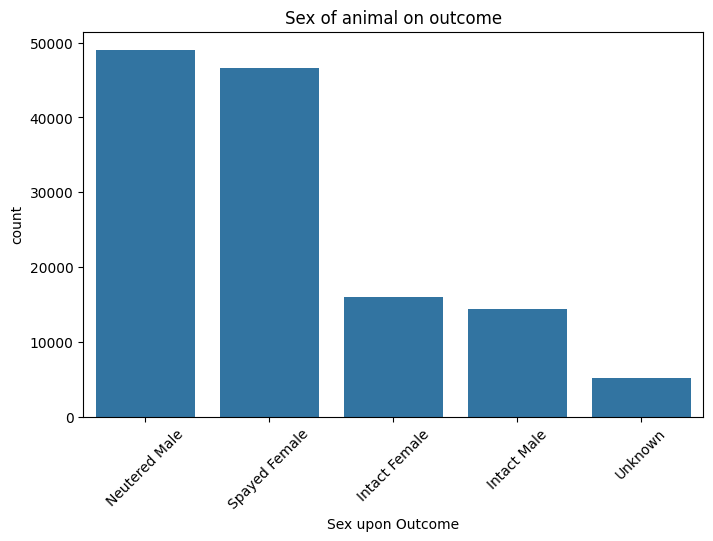

In [1289]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sex upon Outcome', order=df['Sex upon Outcome'].value_counts().index)
plt.title('Sex of animal on outcome')
plt.xticks(rotation=45)
plt.show()

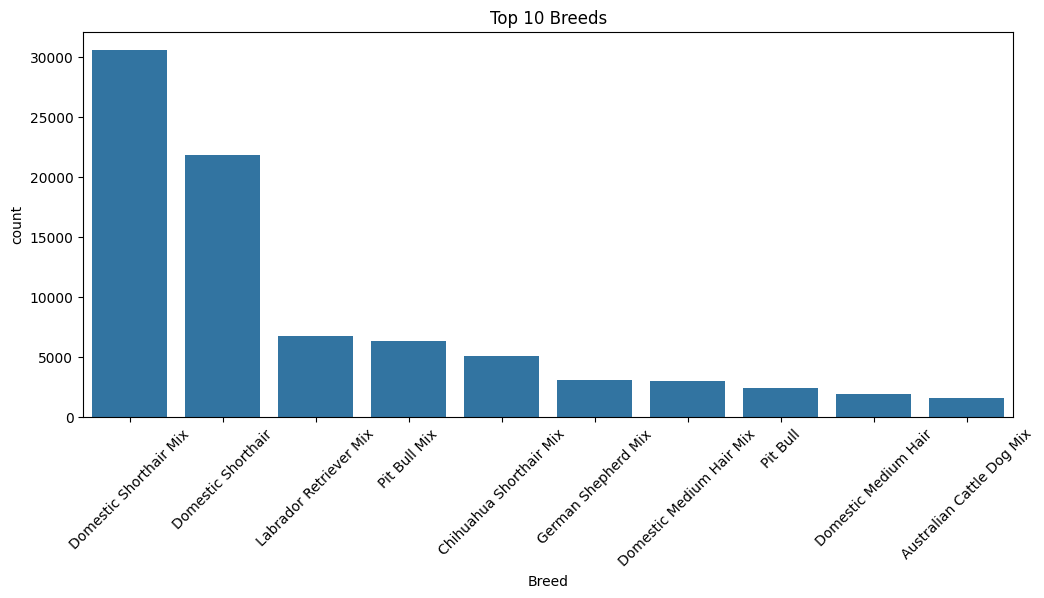

In [1290]:
top_breeds = df['Breed'].value_counts().nlargest(10).index
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['Breed'].isin(top_breeds)], x='Breed', order=top_breeds)
plt.title('Top 10 Breeds')
plt.xticks(rotation=45)
plt.show()


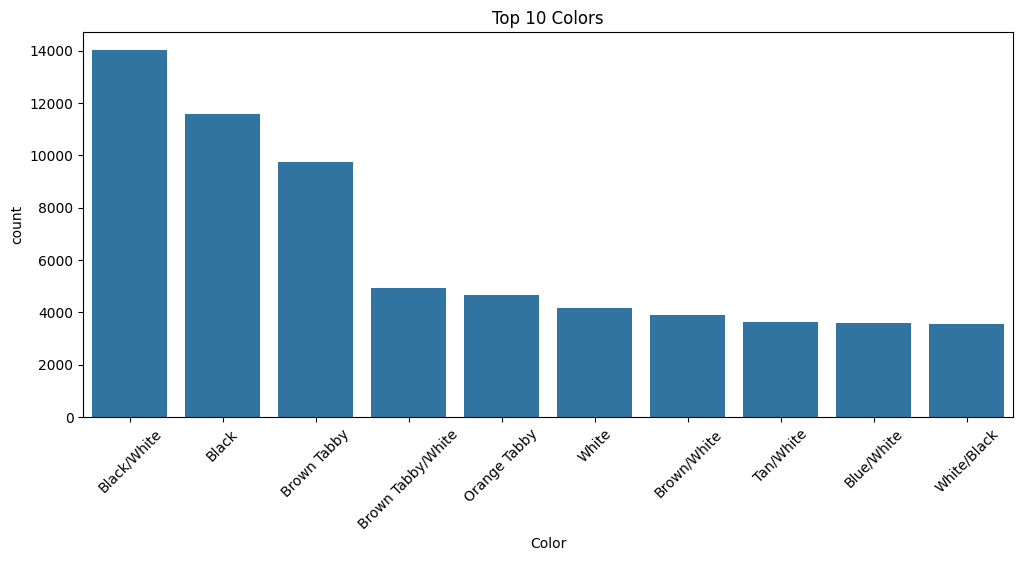

In [1291]:
top_colors = df['Color'].value_counts().nlargest(10).index
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['Color'].isin(top_colors)], x='Color', order=top_colors)
plt.title('Top 10 Colors')
plt.xticks(rotation=45)
plt.show()


One Hot Encoding.

In [1292]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns=['Animal Type', 'Outcome Subtype', 'Sex upon Outcome'], drop_first=False)

In [1293]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   MonthYear                       131108 non-null  object  
 1   Outcome Type                    131108 non-null  category
 2   Age upon Outcome                131108 non-null  float64 
 3   Breed                           131108 non-null  category
 4   Color                           131108 non-null  category
 5   Year                            3205 non-null    float64 
 6   Month                           3205 non-null    float64 
 7   Day                             3205 non-null    float64 
 8   Animal Type_Bird                131108 non-null  bool    
 9   Animal Type_Cat                 131108 non-null  bool    
 10  Animal Type_Dog                 131108 non-null  bool    
 11  Animal Type_Livestock           131108 non-null  bool    
 12  Outcome

In [1294]:
df_encoded.head()

,MonthYear,Outcome Type,Age upon Outcome,Breed,Color,Year,Month,Day,Animal Type_Bird,Animal Type_Cat,...,Outcome Subtype_Offsite,Outcome Subtype_Out State,Outcome Subtype_Partner,Outcome Subtype_SCRP,Outcome Subtype_Snr,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,Jun-14,Transfer,14.0,Duck,Yellow/Black,2014.0,6.0,10.0,True,False,...,False,False,True,False,False,False,False,False,False,True
1,Jun-14,Transfer,14.0,Duck,Yellow/Black,2014.0,6.0,10.0,True,False,...,False,False,True,False,False,False,False,False,False,True
2,Jun-14,Transfer,14.0,Duck,Yellow/Black,2014.0,6.0,10.0,True,False,...,False,False,True,False,False,False,False,False,False,True
3,Jun-14,Transfer,14.0,Duck,Yellow/Black,2014.0,6.0,10.0,True,False,...,False,False,True,False,False,False,False,False,False,True
4,Jun-14,Transfer,14.0,Duck,Yellow/Black,2014.0,6.0,10.0,True,False,...,False,False,True,False,False,False,False,False,False,True


## Part 2.

In [1295]:
df_encoded.drop(['Breed'], axis=1, inplace=True)
df_encoded.isna().sum()

MonthYear                              0
Outcome Type                           0
Age upon Outcome                       0
Color                                  0
Year                              127903
Month                             127903
Day                               127903
Animal Type_Bird                       0
Animal Type_Cat                        0
Animal Type_Dog                        0
Animal Type_Livestock                  0
Outcome Subtype_Barn                   0
Outcome Subtype_Emer                   0
Outcome Subtype_Foster                 0
Outcome Subtype_In State               0
Outcome Subtype_Offsite                0
Outcome Subtype_Out State              0
Outcome Subtype_Partner                0
Outcome Subtype_SCRP                   0
Outcome Subtype_Snr                    0
Sex upon Outcome_Intact Female         0
Sex upon Outcome_Intact Male           0
Sex upon Outcome_Neutered Male         0
Sex upon Outcome_Spayed Female         0
Sex upon Outcome

In [1296]:
# Separate features and target
df_encoded.drop(['Day'], axis=1, inplace=True)
df_encoded.drop(['Month'], axis=1, inplace=True)
df_encoded.drop(['Year'], axis=1, inplace=True)
df_encoded.drop(['MonthYear'], axis=1, inplace=True)
df_encoded.drop(['Color'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Outcome Type'])  
y = df_encoded['Outcome Type']               

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1,stratify=y)
X_train = X_train.drop(columns=[col for col in X_train.columns if col.startswith('Outcome Subtype_')])
X_test  = X_test.drop(columns=[col for col in X_test.columns if col.startswith('Outcome Subtype_')])


In [1297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

pred_y = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, pred_y))
print("\nClassification Report:\n", classification_report(y_test, pred_y))

KNN Accuracy: 0.8556682683751557

Classification Report:
               precision    recall  f1-score   support

    Adoption       0.85      0.95      0.89     25074
    Transfer       0.88      0.69      0.78     14259

    accuracy                           0.86     39333
   macro avg       0.86      0.82      0.84     39333
weighted avg       0.86      0.86      0.85     39333

